Crear matrices para medir la correlación entre los diferentes compuestos medidos en una misma estación.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
places=["Barcelona, L'Eixample", "Paterna", "Málaga", "Bilbao, Parque Europa", "Cádiz", "Gijón", "Almería", "Palma", "Tenerife", "Cáceres, Toril", "Madrid, Plaza de España", "Albacete", "Burgos, Plaza lavaderos", "Zaragoza, Roger de la Flor", "Sevilla, La ranilla", "Valladolid, Arco de Ladrillo", "Badajoz", "Igualada, La Masuca (Barcelona)", "El Grao de Castellón", "Vigo, Estación 1, Avda Citröen"]
chems=["C6H6", "CO", "NO", "NOx", "NO2", "SO2", "PM10", "PM25", "O3"]

In [3]:
file = "DatosFinales.xlsx"
df = pd.read_excel(file)

In [4]:
dfCRF = pd.DataFrame()
dfCRF["Compuestos"] = chems
dfCRF = dfCRF.set_index("Compuestos")
for chem in chems:
    dfCRF[chem]=len(chems)*[0]

In [5]:
dfCR = pd.DataFrame()
dfCR["Compuestos"] = chems
dfCR = dfCR.set_index("Compuestos")
for chem in chems:
    dfCR[chem]=len(chems)*[0]

In [6]:
dfNanos = pd.DataFrame()
dfNanos["Compuestos"] = chems
dfNanos = dfNanos.set_index("Compuestos")
for chem in chems:
    dfNanos[chem]=len(chems)*[0]

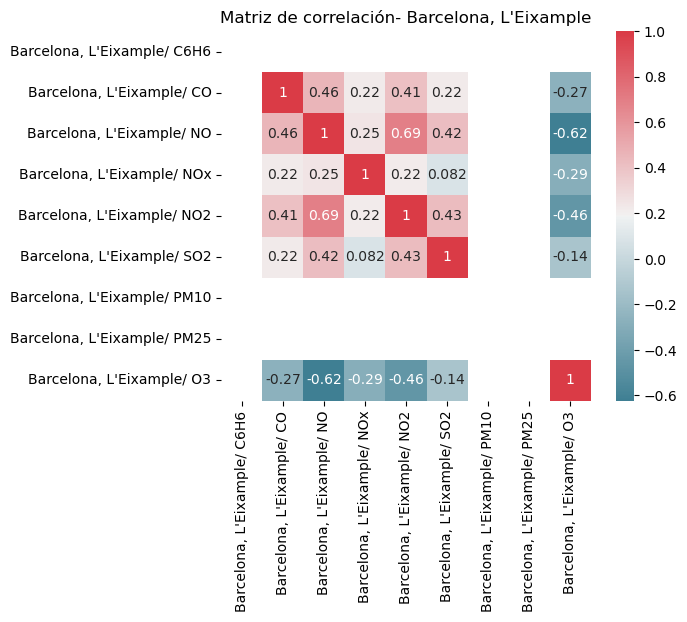

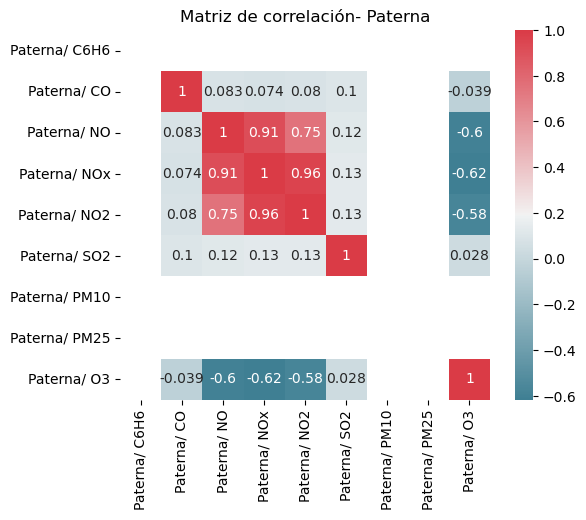

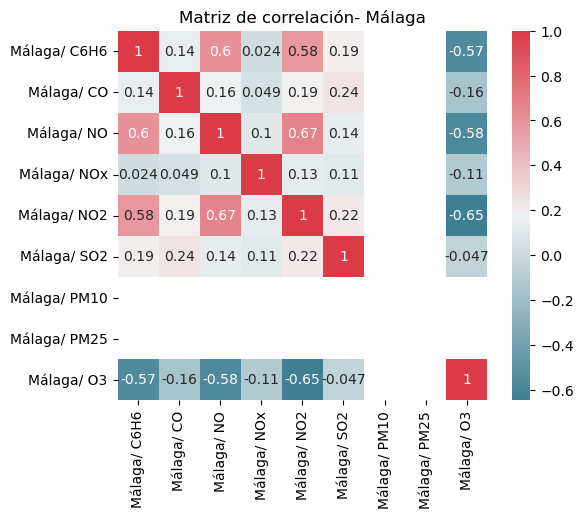

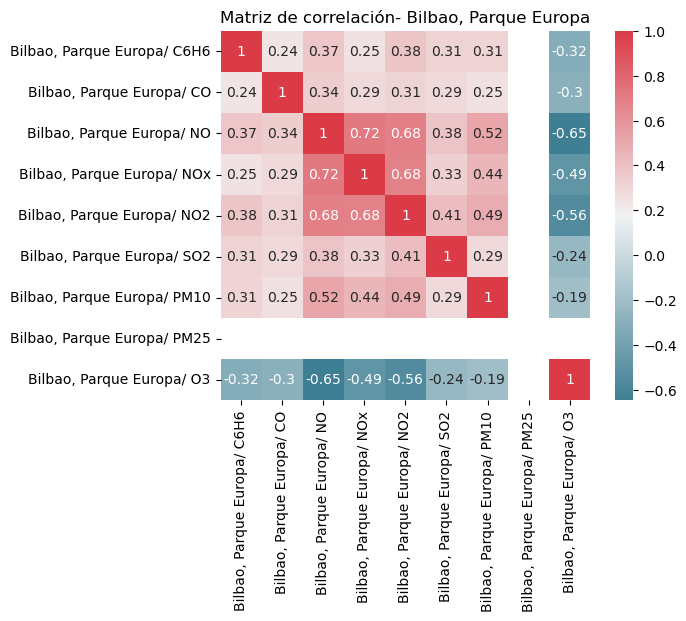

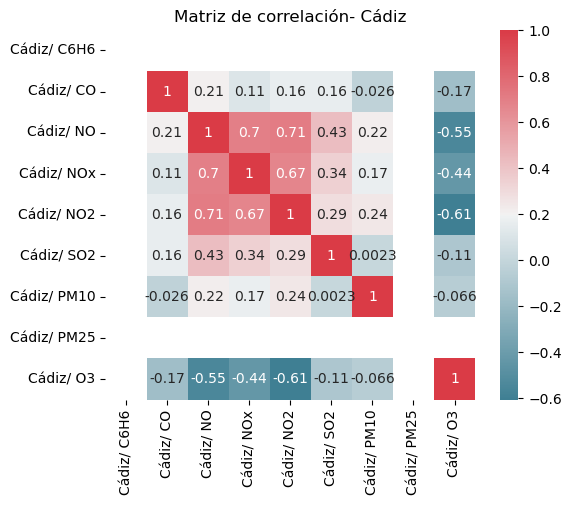

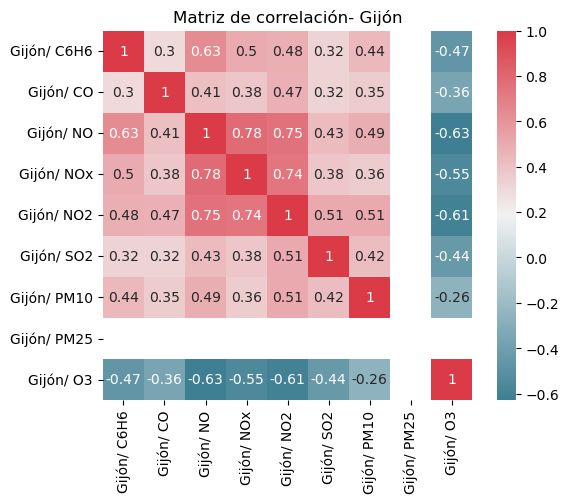

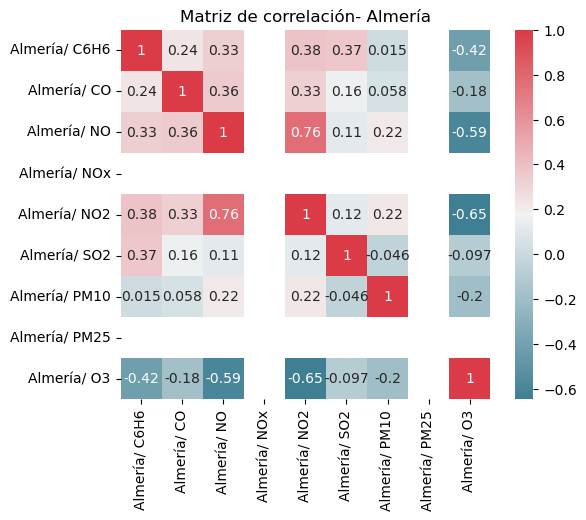

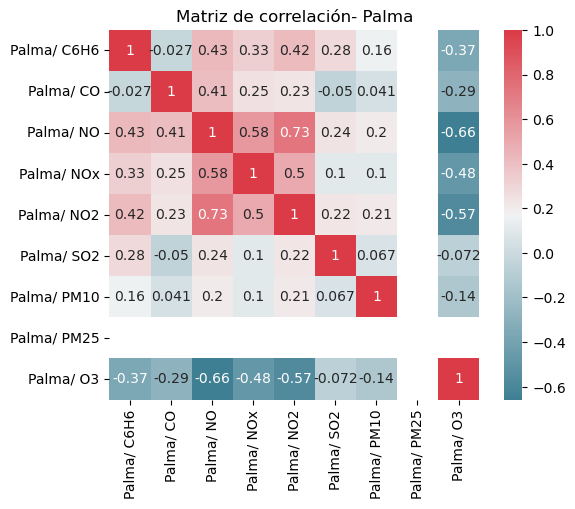

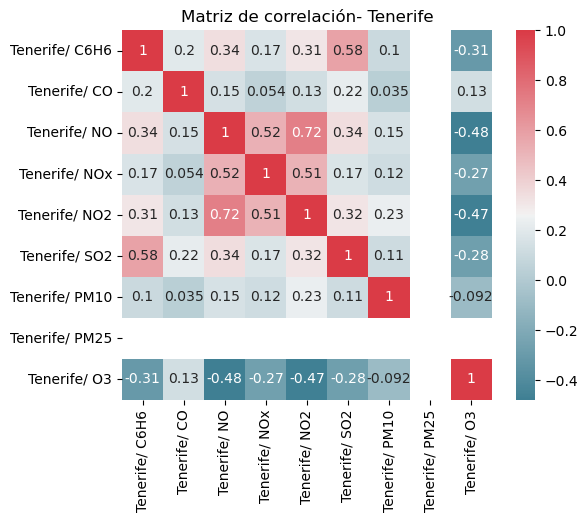

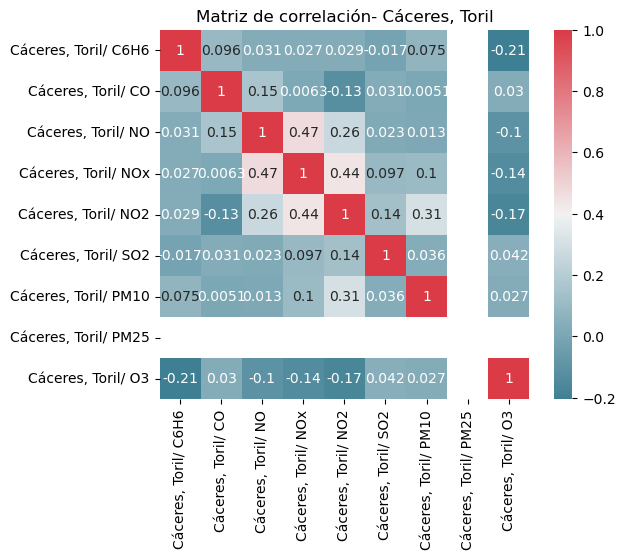

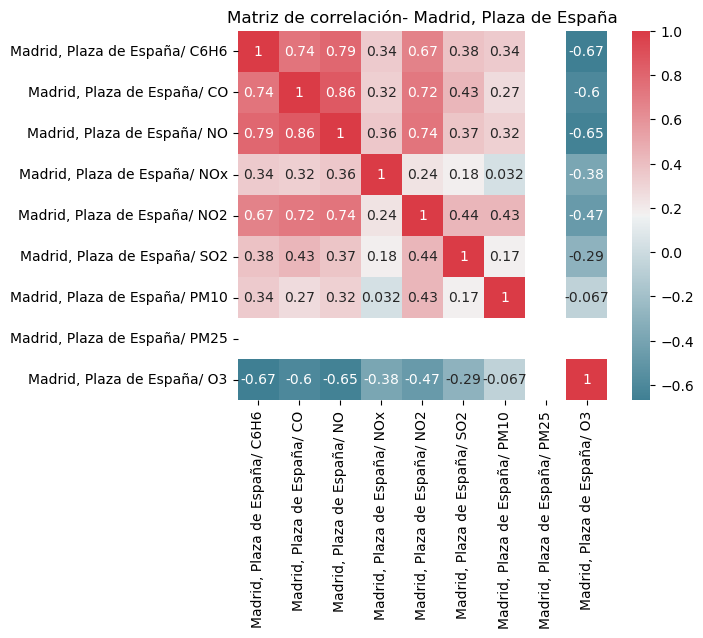

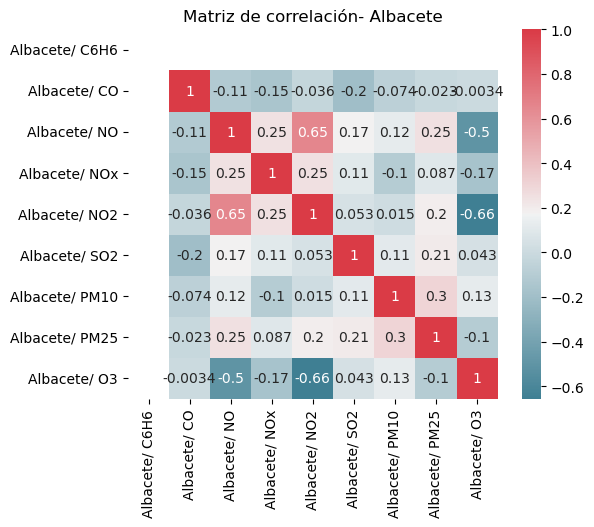

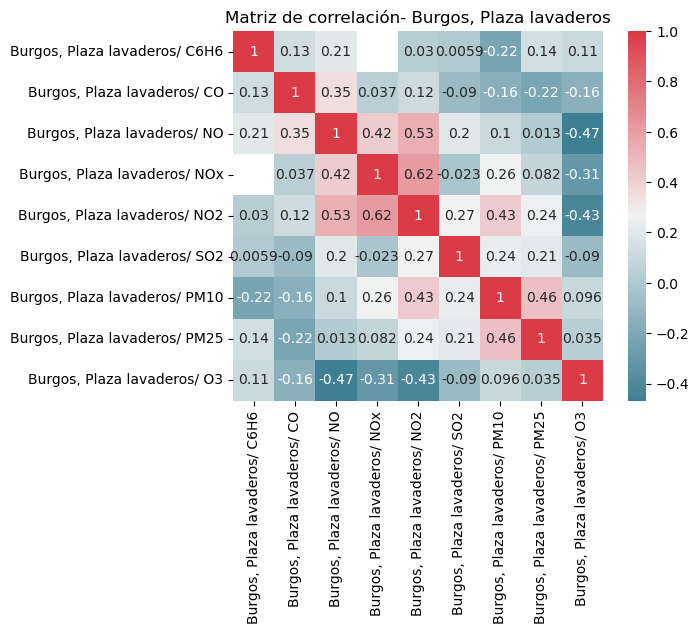

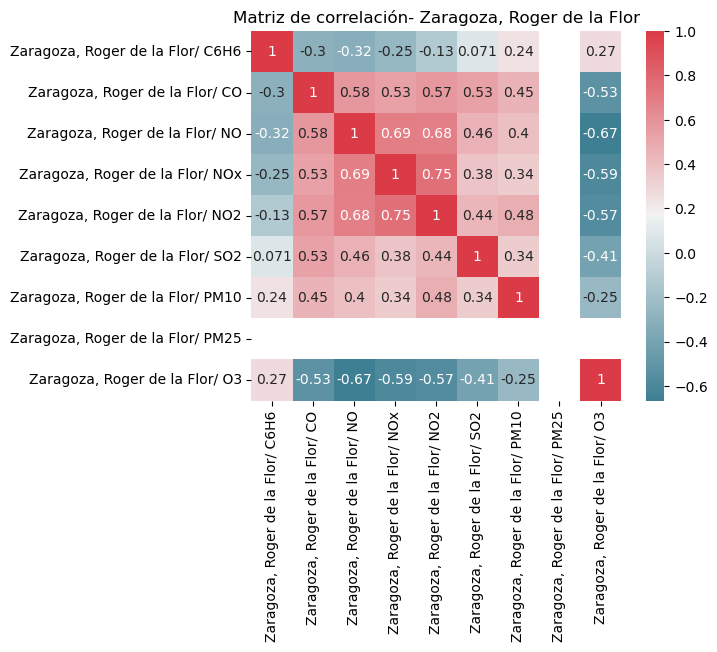

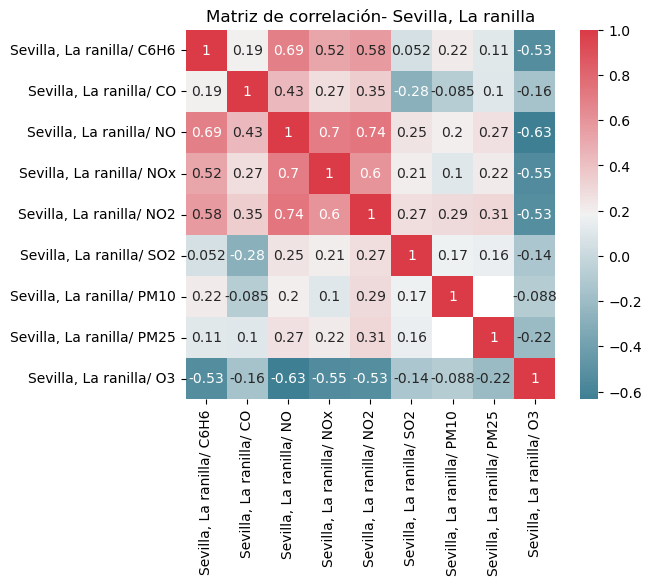

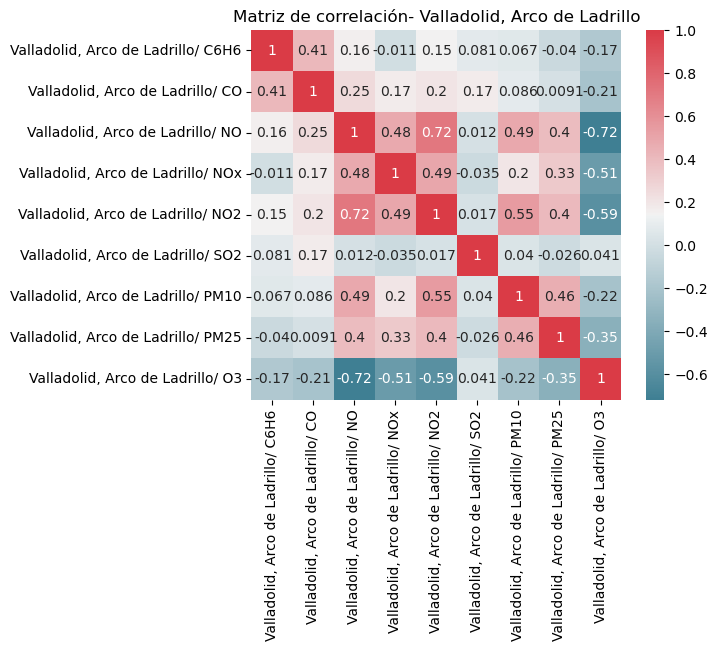

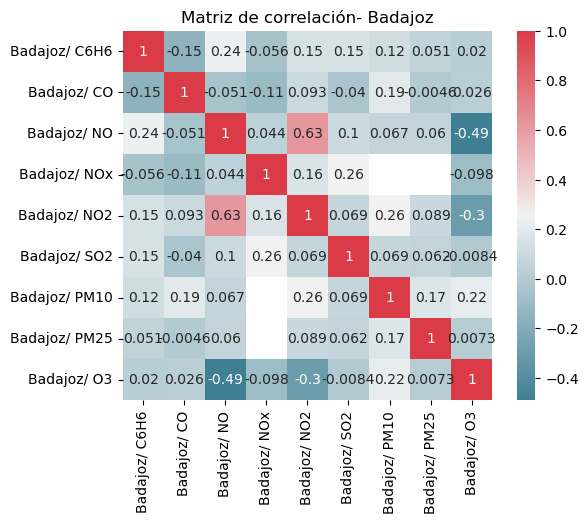

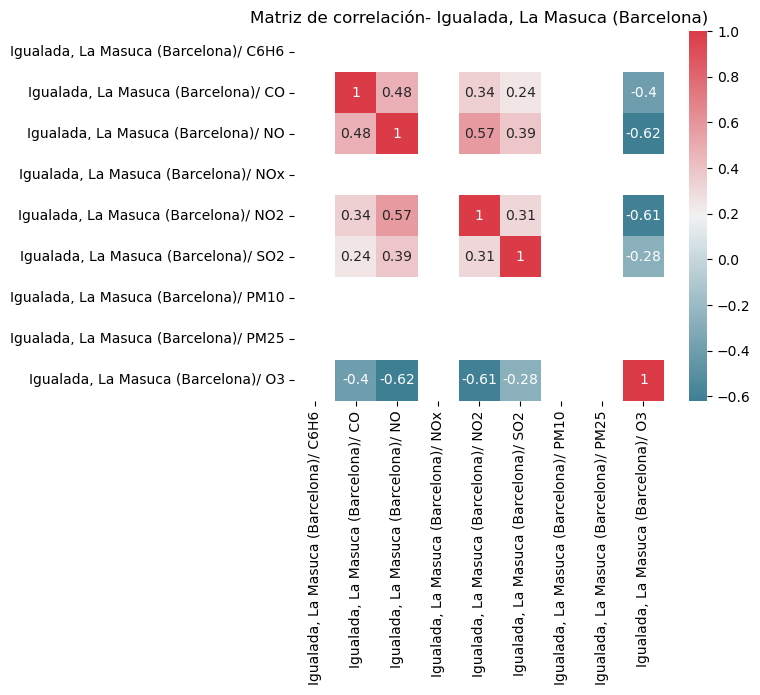

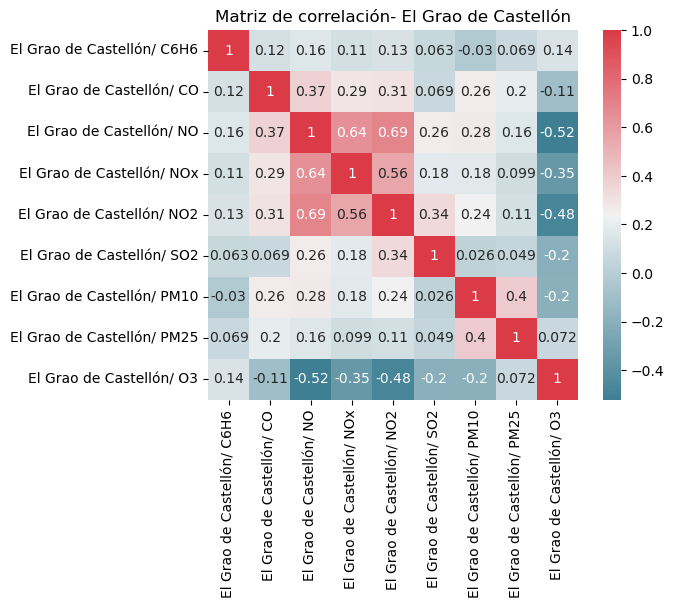

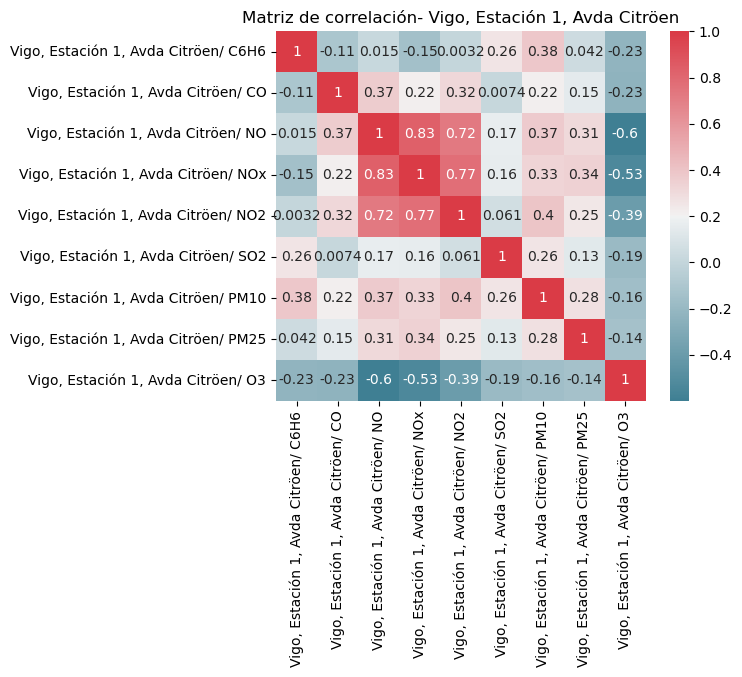

In [7]:
for place in places:
    df_est=pd.DataFrame()
    for chem in chems:
        df_est[place+"/ "+chem]=df[place+"/ "+chem]
    corr_matriz=df_est.corr()
    matriz_aux=corr_matriz.copy()
    matriz_aux.fillna('nan', inplace=True)
    for chem1 in chems:
        for chem2 in chems:
            elem=matriz_aux.loc[place+"/ "+chem2, place+"/ "+chem1]
            if elem=='nan':
                dfNanos.loc[chem2, chem1]+=1
            else:
                dfCR.loc[chem2, chem1]+=elem
    for chem1 in chems:
        for chem2 in chems:
            dfCRF.loc[chem2, chem1]=dfCR.loc[chem2, chem1]/(len(places)-dfNanos.loc[chem2, chem1])
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr_matriz, annot=True, cmap=cmap, square=True)
    plt.title(f'Matriz de correlación- {place}')
    # plt.savefig("./GraphicsCorrelation")
    plt.show()

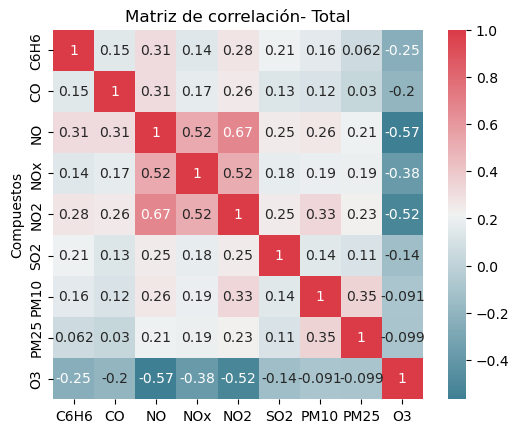

In [8]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(dfCRF, annot=True, cmap=cmap, square=True)
plt.title(f'Matriz de correlación- Total')
plt.show()